# **WHAT IS BRAIN TUMOR?**
>
A brain tumor is an abnormal growth of cells in the brain. These growths can be either benign (non-cancerous) or malignant (cancerous). Benign tumors do not spread to other parts of the body and are generally less aggressive, while malignant tumors can invade nearby tissues and spread to other parts of the body. Brain tumors can be classified as primary, originating in the brain itself, or secondary, resulting from the spread of cancer from other parts of the body.





# **ABSTRACT**
> Brain tumors are highly aggressive diseases affecting both children and adults, constituting 85 to 90 percent of all primary Central Nervous System (CNS) tumors. Annually, approximately 11,700 people receive a brain tumor diagnosis. The 5-year survival rates for cancerous brain or CNS tumors hover around 34 percent for men and 36 percent for women. Brain tumors are categorized as benign, malignant, pituitary tumors, among others. Effective treatment strategies, careful planning, and precise diagnostics are essential for enhancing the life expectancy of patients.

> A crucial diagnostic tool for brain tumors is Magnetic Resonance Imaging (MRI), which generates vast amounts of image data through scans. Radiologists analyze these images, but manual examination is prone to errors due to the intricate nature of brain tumors and their properties. Therefore, implementing advanced techniques and technologies is vital for accurate diagnosis and treatment planning.





# **GILOMA TUMOR**
> A glioma is a type of tumor that originates in the glial cells of the brain or spinal cord. Glial cells provide support and nourishment for neurons, the primary cells of the nervous system. Gliomas can vary in severity, ranging from slow-growing and noncancerous (benign) to fast-growing and cancerous (malignant).



# **PITUITARY GLAND**
> A pituitary tumor is an abnormal growth that develops in the pituitary gland, a small gland located at the base of the brain. The pituitary gland plays a crucial role in regulating various bodily functions by producing hormones that control growth, metabolism, and other essential processes.



# **meningioma TUMOR**
A meningioma is a type of tumor that arises from the meninges, which are the layers of tissue covering the brain and spinal cord. These tumors are usually slow-growing and are typically classified as benign, although they can be locally invasive.

# **Importing Requirments Modules from tensorflow & Keras**

In [38]:
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.utils import plot_model
from glob import glob
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Softmax
from tensorflow.keras.optimizers import Adam

In [39]:
Image_size = [224,224]
valid_path = "/kaggle/input/mri-based-brain-tumor/Testing"
train_path = "/kaggle/input/mri-based-brain-tumor/Training"


**VGG19 is a deep convolutional neural network architecture that belongs to the VGG (Visual Geometry Group) family.<br/> It was proposed by the Visual Geometry Group at the University of Oxford and is an extension of the original VGG16 architecture.<br/> The "19" in VGG19 refers to the total number of layers in the network, including 16 convolutional and 3 fully connected layers.**

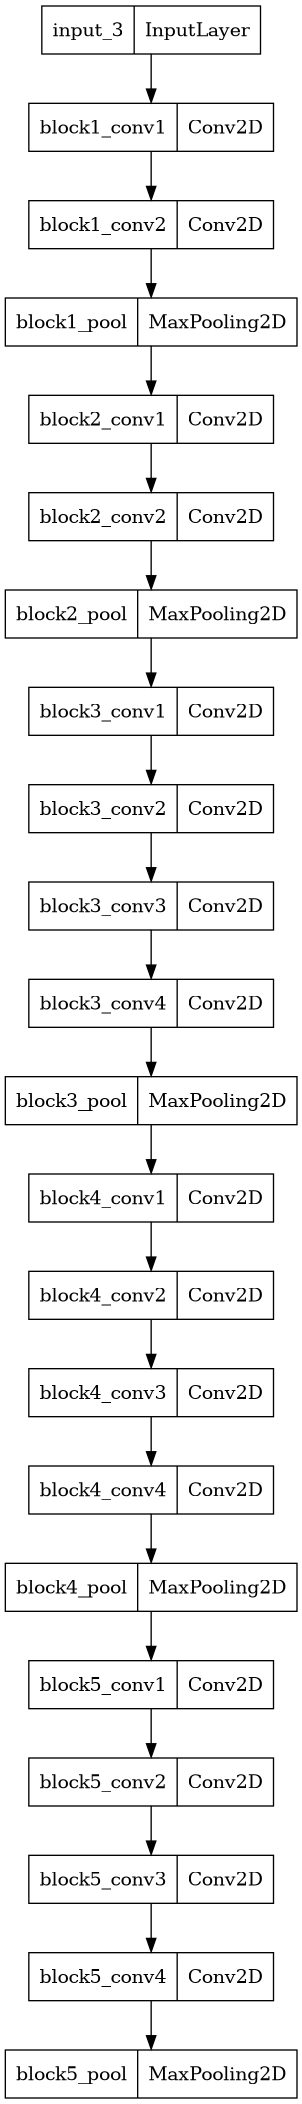

In [40]:
# Load the pre-trained VGG19 model (without the top layers) from Keras applications.
vgg19 = VGG19(include_top=False , input_shape=Image_size+[3],weights='imagenet')
plot_model(vgg19)

In [41]:
# Freeze the weights of the pre-trained VGG19 layers
for layer in vgg19.layers:
    layer.trainable = False

In [42]:
# Use the glob function to get a list of folders in the specified directory path
folders = glob("/kaggle/input/mri-based-brain-tumor/Training/*")
folders

['/kaggle/input/mri-based-brain-tumor/Training/no_tumor',
 '/kaggle/input/mri-based-brain-tumor/Training/pituitary_tumor',
 '/kaggle/input/mri-based-brain-tumor/Training/meningioma_tumor',
 '/kaggle/input/mri-based-brain-tumor/Training/glioma_tumor']

In [43]:
x = Flatten()(vgg19.output)

prediction = Dense(len(folders),activation='softmax')(x)
model = Model(inputs = vgg19.input , outputs = prediction)
plot_model(model)
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [45]:
# Import the necessary module for image data generation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale = 1./255,          # Rescale the pixel values to be between 0 and 1
    shear_range = 0.2,         # Apply random shear transformations
    zoom_range = 0.2,          # Apply random zoom transformations
    horizontal_flip = True     # Flip images horizontally
)

# Create an ImageDataGenerator for testing/validation data
test_datagen = ImageDataGenerator(
    rescale = 1./255           # Rescale the pixel values to be between 0 and 1
)


In [46]:
training_set = train_datagen.flow_from_directory("/kaggle/input/mri-based-brain-tumor/Training",target_size=(224,224),batch_size=64,class_mode='categorical')
test_set = train_datagen.flow_from_directory("/kaggle/input/mri-based-brain-tumor/Testing",target_size=(224,224),batch_size=64,class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [47]:
# Compile the model using the Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#---------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Epoch 1/20
45/45 [==============================] - 57s 1s/step - loss: 1.1426 - accuracy: 0.4958 - val_loss: 386.5876 - val_accuracy: 0.3503
Epoch 2/20
45/45 [==============================] - 55s 1s/step - loss: 0.7751 - accuracy: 0.6979 - val_loss: 801.4171 - val_accuracy: 0.4188
Epoch 3/20
45/45 [==============================] - 54s 1s/step - loss: 0.6344 - accuracy: 0.7704 - val_loss: 1016.1142 - val_accuracy: 0.5051
Epoch 4/20
45/45 [==============================] - 55s 1s/step - loss: 0.5641 - accuracy: 0.7920 - val_loss: 884.7889 - val_accuracy: 0.5330
Epoch 5/20
45/45 [==============================] - 55s 1s/step - loss: 0.5168 - accuracy: 0.8160 - val_loss: 1177.9351 - val_accuracy: 0.5279
Epoch 6/20
45/45 [==============================] - 60s 1s/step - loss: 0.4801 - accuracy: 0.8355 - val_loss: 991.1096 - val_accuracy: 0.5482
Epoch 7/20
45/45 [==============================] - 61s 1s/step - loss: 0.4369 - accuracy: 0.8561 - val_loss: 514.4559 - val_accuracy: 0.5685
Epoc

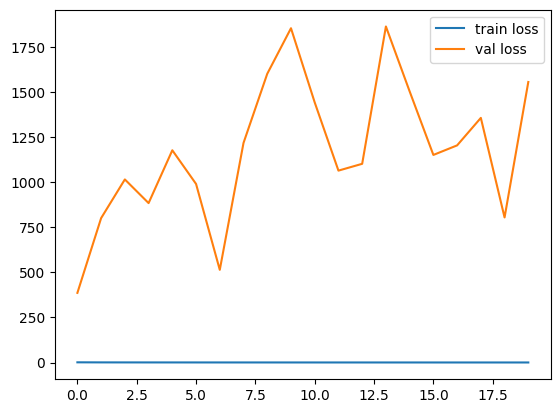

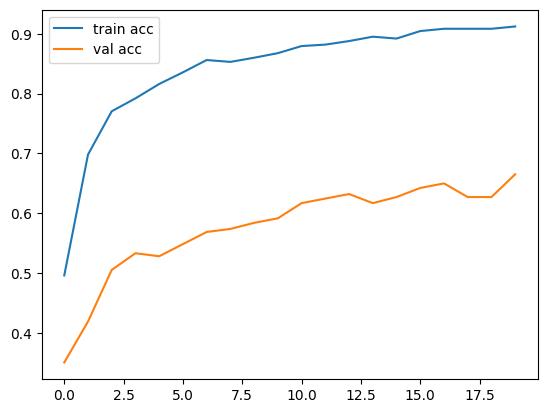

<Figure size 640x480 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')